In [3]:
import numpy as np
import sep
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
data = astropy.io.fits.getdata("f105w.fits")
print(data)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


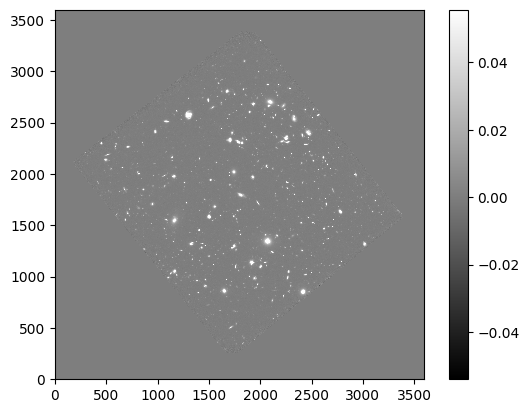

In [5]:
m, s = np.mean(data), np.std(data)

plt.imshow(data, interpolation='nearest' , cmap='gray' , vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

#plt.savefig("Figure-1.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

In [6]:
data = data.byteswap(False).newbyteorder()

bkg = sep.Background(data)

In [7]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [8]:
bkg_image = bkg.back()

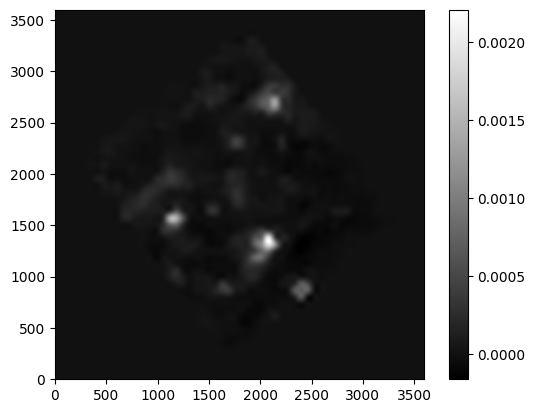

In [9]:
plt.imshow(bkg_image, interpolation='nearest' ,cmap='gray'  ,origin='lower')
plt.colorbar();

#plt.savefig("Figure-2.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

In [10]:
bkg_rms = bkg.rms()

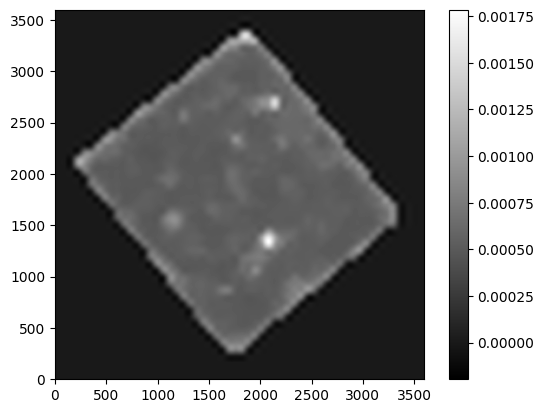

In [11]:
plt.imshow(bkg_rms, interpolation='nearest' ,cmap='gray' ,origin='lower')
plt.colorbar();

#plt.savefig("Figure-3.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

In [12]:
data_sub = data - bkg

In [13]:
objects = sep.extract(data_sub, 3, err=bkg.globalrms)

len(objects)

4349

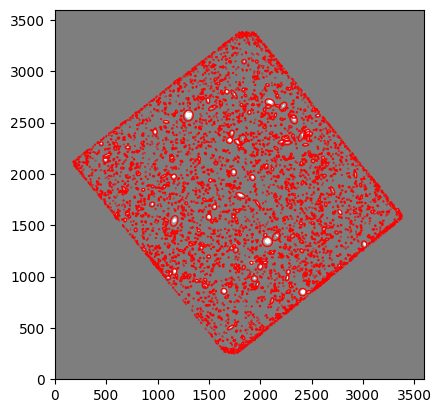

In [14]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub , interpolation='nearest' , cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects ['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

#plt.savefig("Figure-4.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

In [15]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

/var/folders/pt/p87f35ws41794fvfz1drc2300000gn/T/ipykernel_2010/2615656261.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(flux), bins=10)


(array([   7.,   44., 1541., 1738.,  649.,  269.,   66.,   12.,    6.,
           2.]),
 array([-3.04961884, -2.45396372, -1.85830859, -1.26265347, -0.66699835,
        -0.07134322,  0.5243119 ,  1.11996703,  1.71562215,  2.31127727,
         2.9069324 ]),
 <BarContainer object of 10 artists>)

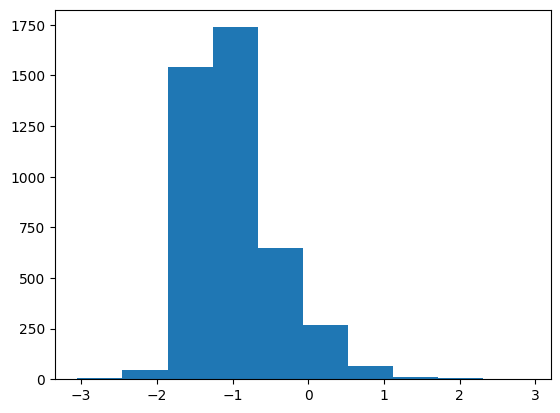

In [17]:
plt.figure()
plt.hist(np.log10(flux), bins=10)

In [18]:
for i in range (len(objects)):
    print('object {:d}: flux = {:f} +/- {:f}' .format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029831 +/- 0.172742
object 1: flux = 0.085622 +/- 0.292626
object 2: flux = 0.026933 +/- 0.164137
object 3: flux = 0.046099 +/- 0.214727
object 4: flux = 0.064379 +/- 0.253747
object 5: flux = 0.070986 +/- 0.266448
object 6: flux = 0.026083 +/- 0.161527
object 7: flux = 0.104682 +/- 0.323559
object 8: flux = 0.044953 +/- 0.212041
object 9: flux = 0.042711 +/- 0.206686
object 10: flux = 0.011400 +/- 0.106811
object 11: flux = 0.049093 +/- 0.221588
object 12: flux = 0.034875 +/- 0.186770
object 13: flux = 0.040538 +/- 0.201360
object 14: flux = 0.023936 +/- 0.154741
object 15: flux = 0.055273 +/- 0.235120
object 16: flux = 0.030075 +/- 0.173446
object 17: flux = 0.055099 +/- 0.234750
object 18: flux = 0.063030 +/- 0.251075
object 19: flux = 0.018744 +/- 0.136938
object 20: flux = 0.027169 +/- 0.164855
object 21: flux = 0.041373 +/- 0.203423
object 22: flux = 0.042518 +/- 0.206220
object 23: flux = 0.042432 +/- 0.206009
object 24: flux = 0.077463 +/- 0.278336
object 25:

In [19]:
print(np.mean(flux))
print(np.median(flux))
print(np.std(flux))


0.7040430645638499
0.07352971739572241
13.01835009130945


use f125w f160w and f105w to make a 3 color image

In [20]:
data2 = astropy.io.fits.getdata("f125w.fits")
data2 = data2.byteswap(False).newbyteorder()

data3 = astropy.io.fits.getdata("f160w.fits")
data3 = data3.byteswap(False).newbyteorder()

print(data)
print(data2)
print(data3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[29002.318 29790.186 31840.213 ... 35052.156 37708.727 33884.89 ]
 [32519.666 34533.023 32314.389 ... 32640.6   34328.156 32937.914]
 [32534.648 32695.615 31560.04  ... 34830.508 32359.834 35517.992]
 ...
 [31767.393 30976.217 32305.934 ... 32550.225 30476.297 33947.355]
 [33054.754 31946.693 32222.904 ... 31550.04  31108.781 31810.586]
 [32090.672 31074.297 33549.363 ... 33138.23  30810.16  31615.736]]
[[36799.137 37383.31  32642.    ... 40197.13  40652.566 39102.88 ]
 [36430.254 36359.695 37947.375 ... 39956.164 38357.684 39448.27 ]
 [37650.242 35498.555 36088.957 ... 35045.746 40187.965 42470.3  ]
 ...
 [34451.58  31966.084 32230.385 ... 36644.83  33466.047 34516.355]
 [32996.863 33084.77  30177.096 ... 35240.613 37801.008 38683.42 ]
 [31664.209 35153.566 31204.238 ... 36056.88  37311.59  37855.24 ]]


In [25]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [26]:
data, dmin, dmax = rescale_image(data)
data2, d2min, d2max = rescale_image(data2)
data3, d3min, d3max = rescale_image(data3)

In [27]:
data[data<dmin] = dmin
data[data>dmax] = dmax
data2[data2<dmin] = d2min
data2[data2>dmax] = d2max
data3[data3<dmin] = d3min
data3[data3>dmax] = d3max

In [30]:
rgb = np.zeros((data[0], data2[1], data3[2]))
rgb[:,:,0] = data
rgb[:,:,1] = data2
rgb[:,:,2] = data3

TypeError: only integer scalar arrays can be converted to a scalar index

NameError: name 'rgb' is not defined

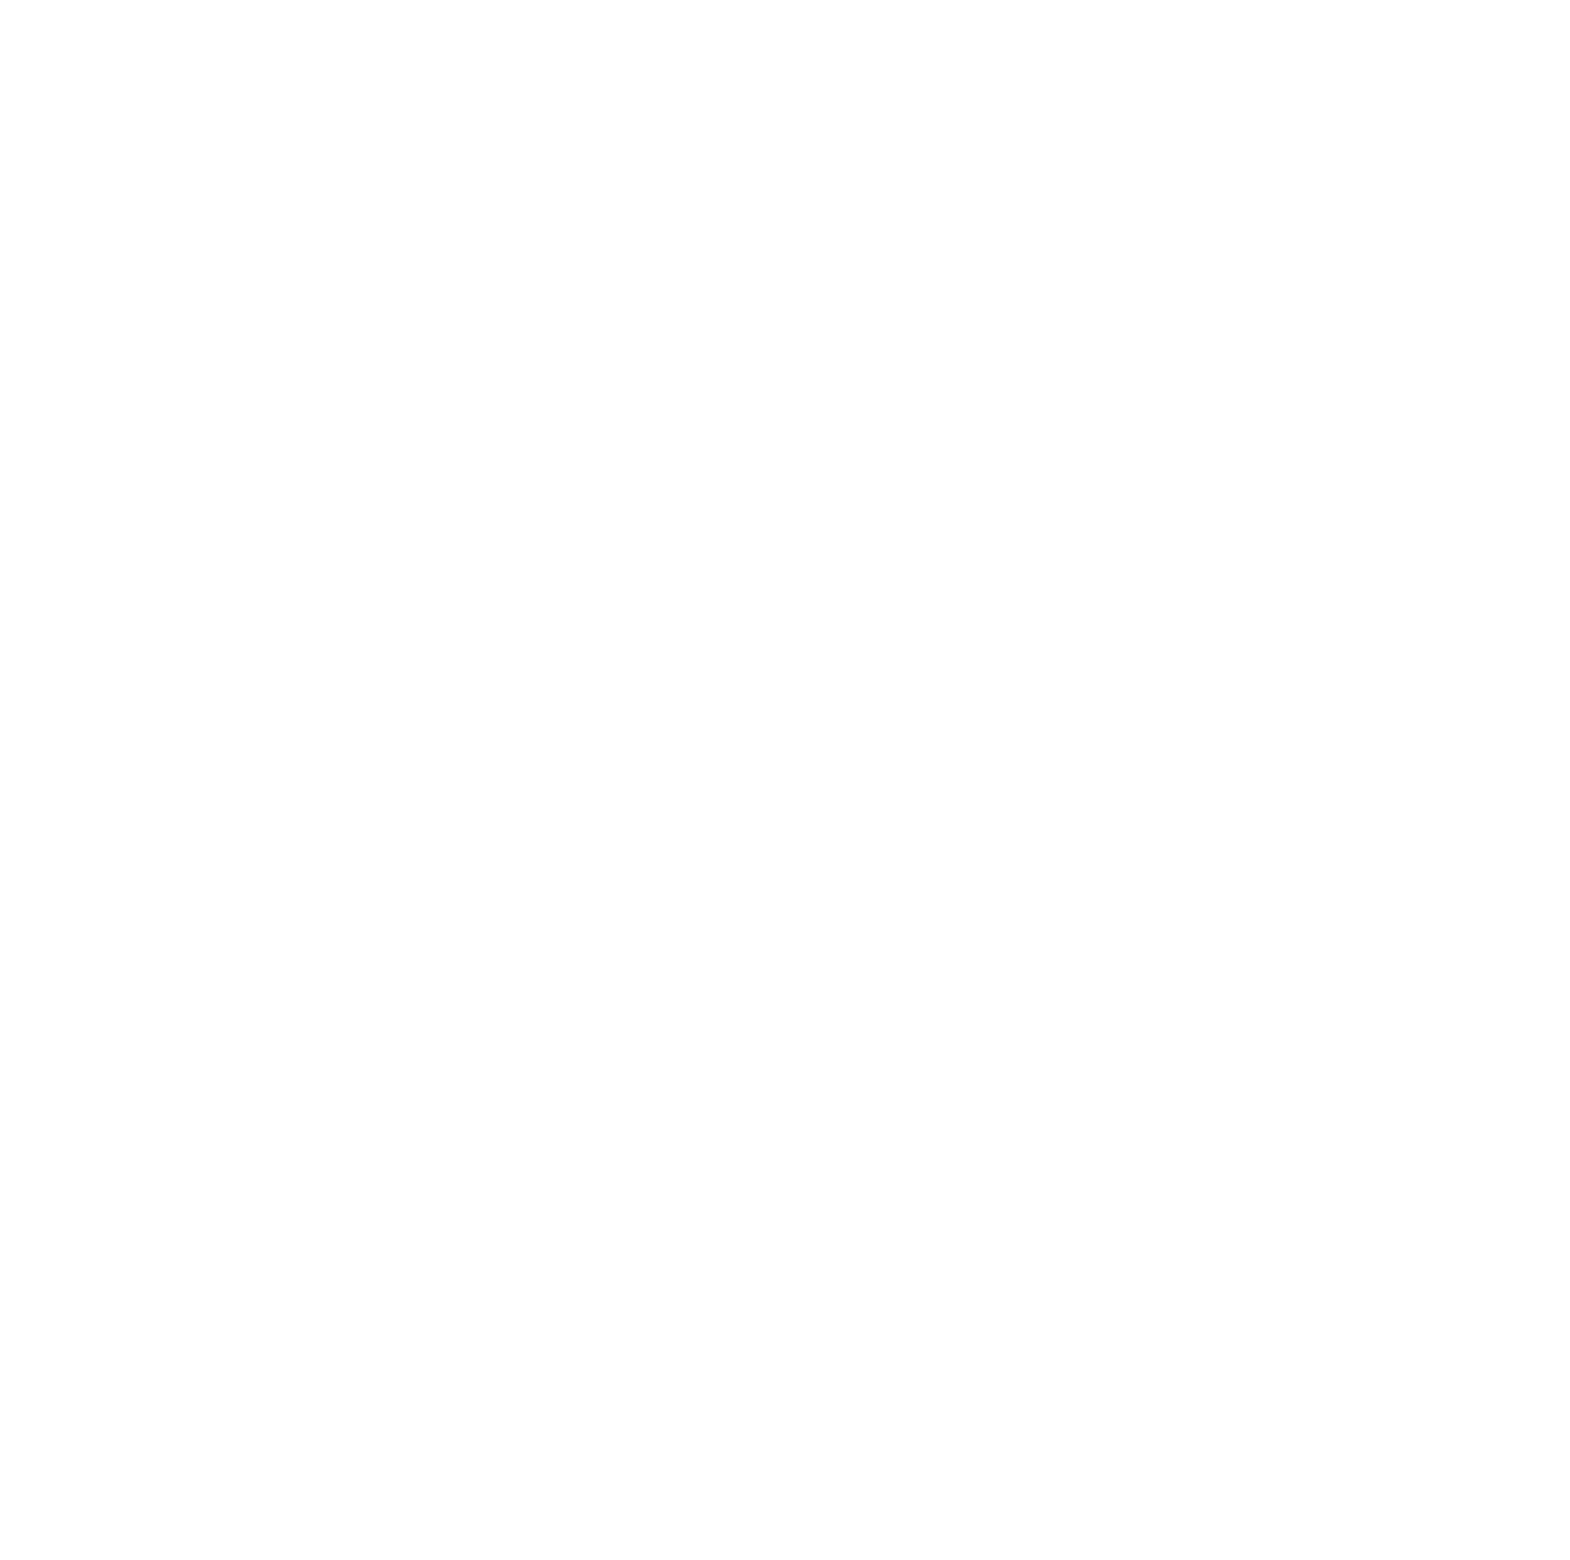

In [32]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
#plt.show()
#plt.savefig('Final-Project.png' ,bbox_inches='tight' ,pad_inches=0, dpi=600)